## Анализируем лица с помощью искусственного интеллекта

Большое количество контента в интернет/соц.сетях - это изображения. Мы можем использовать нейросетевые модели для извлечения из изображений глубинной информации о содержимом, например:
 * Для каждого из людей на фото - пол, возраст, испытываемые эмоции, наличие аксессуаров на лице
 * Список объектов на фотографии
 * Контекст: в помещении, на улице
 * Тип фото: портрет, групповое фото, пейзаж
 * Цветовая гамма

В нашем случае мы сконцентрируемся на извлечении информации о людях. Для извлечения эмоций используем библиотеку [DeepFace](https://pypi.org/project/deepface/):

In [5]:
import sys
!{sys.executable} -m pip install deepface ipyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import cv2
import imageio.v3 as iio
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


Для анализа лица служит функция `analyze`:

In [ ]:
DeepFace.analyze("image.JPG")

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]   


{'emotion': {'angry': 11.140315072574028,
  'disgust': 0.0011833501549554709,
  'fear': 0.11831042603006077,
  'happy': 83.5462729389993,
  'sad': 0.11827849330347696,
  'surprise': 0.2650479170737168,
  'neutral': 4.810592360567136},
 'dominant_emotion': 'happy',
 'region': {'x': 33, 'y': 53, 'w': 86, 'h': 86},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.6553309038281441,
  'indian': 3.0351547524333,
  'black': 0.19891236443072557,
  'white': 45.8880752325058,
  'middle eastern': 23.768138885498047,
  'latino hispanic': 26.454389095306396},
 'dominant_race': 'white'}

Поскольку такая функция анализирует только одно лицо, нам необходимо сначала извлечь все лица на фотографии. Это можно сделать с помощью `FaceDetector`:

In [15]:
detector = FaceDetector.build_model("mtcnn")

img = iio.imread("http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg")
detector.detect_faces(img)

2/2 [==============================] - 0s 7ms/step


[{'box': [483, 198, 40, 43],
  'confidence': 0.9999978542327881,
  'keypoints': {'left_eye': (492, 214),
   'right_eye': (511, 211),
   'nose': (501, 224),
   'mouth_left': (495, 232),
   'mouth_right': (513, 230)}},
 {'box': [921, 169, 57, 71],
  'confidence': 0.9999954700469971,
  'keypoints': {'left_eye': (938, 195),
   'right_eye': (964, 195),
   'nose': (951, 210),
   'mouth_left': (939, 221),
   'mouth_right': (962, 221)}},
 {'box': [633, 198, 51, 66],
  'confidence': 0.9999659061431885,
  'keypoints': {'left_eye': (647, 225),
   'right_eye': (671, 224),
   'nose': (659, 240),
   'mouth_left': (648, 247),
   'mouth_right': (672, 246)}},
 {'box': [350, 187, 41, 50],
  'confidence': 0.9997923970222473,
  'keypoints': {'left_eye': (362, 206),
   'right_eye': (382, 203),
   'nose': (376, 209),
   'mouth_left': (366, 224),
   'mouth_right': (386, 221)}}]

Теперь построим свою функцию `analyze`, которая сначала выделяет лица, и потом анализирует каждое из них:

In [16]:
def analyze(img):
    try:
      res = DeepFace.analyze(img,silent=True)
    except:
      return []
    z = []
    for x in res:
      x1,y1,w1,h1 = x['region'].values()
      z.append({ "box" : x['region'], "face" : img[y1:y1+h1,x1:x1+w1],
                   "emotion" : x['emotion'], "dominant_emotion" : x['dominant_emotion'],
                   "age" : x['age'], "gender" : x['dominant_gender']})
    return z


analyze(img)

[{'box': {'x': 346, 'y': 182, 'w': 55, 'h': 55},
  'face': array([[[129, 142, 112],
          [160, 174, 159],
          [180, 195, 190],
          ...,
          [ 80,  76,  47],
          [ 80,  76,  51],
          [ 71,  71,  47]],
  
         [[134, 147, 121],
          [160, 176, 165],
          [165, 181, 168],
          ...,
          [ 81,  77,  52],
          [ 84,  73,  51],
          [ 73,  73,  49]],
  
         [[123, 135,  95],
          [130, 149, 121],
          [139, 157, 133],
          ...,
          [ 77,  76,  48],
          [ 78,  72,  48],
          [ 76,  74,  51]],
  
         ...,
  
         [[ 31,  22,  17],
          [ 31,  23,  20],
          [ 28,  23,  19],
          ...,
          [102,  85,  67],
          [ 96,  79,  61],
          [ 91,  73,  53]],
  
         [[ 33,  24,  17],
          [ 30,  23,  17],
          [ 28,  20,  17],
          ...,
          [102,  87,  68],
          [100,  85,  66],
          [104,  86,  66]],
  
         [[ 38,  25, 

### Анализируем фотографии с летней школы

Проанализируем фотографии с летней школы ИИ, расположенные в интернет [вот тут](http://psy.msu.ru/science/conference/summer/2019/photo/index.html).
Можно заметить, что все фотографии имеют адрес http://psy.msu.ru/science/conference/summer/2019/photo/xxx.jpg, где xxx - номер фото, от 000 до 131.

In [6]:
urls = ["http://psy.msu.ru/science/conference/summer/2019/photo/{:03d}.jpg".format(i) for i in range(1,131)]

In [7]:
import pandas as pd
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [11]:
ipyplot.plot_images(urls[::10],img_width=150)

In [17]:
data = []
imgs = []
for x in urls:
    print("Analyzing {} ...".format(x),end='')
    img = iio.imread(x)
    res = analyze(img)
    nfaces = len(res)
    print(nfaces, ' faces')
    for t in res:
        em = t['emotion']
        z = { 'gender' : t['gender'], 'age' : t['age'], 'nfaces' : nfaces }
        data.append(dict(list(z.items())+list(em.items())))
        imgs.append(t['face'])
print("Found {} faces".format(len(data)))

Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/001.jpg ...2  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/002.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/003.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/004.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/005.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/006.jpg ...0  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/007.jpg ...5  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/008.jpg ...2  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/009.jpg ...1  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/010.jpg ...2  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg ...5  faces
Analyzing http://psy.msu.ru/science/conference/summer/2019/photo/

In [18]:
import json
import pickle
with open('data.json','w') as f:
    json.dump(data,f)
with open('imgs.pkl','wb') as f:
    pickle.dump(imgs,f)

Вот как можно загрузить сохранённые данные:

In [ ]:
with open('data.json','r') as f:
    data = json.load(f)
with open('imgs.pkl','rb') as f:
    imgs = pickle.load(f)

Преобразуем данные к DataFrame для анализа:

In [19]:
df = pd.DataFrame(data)
df

,gender,age,nfaces,angry,disgust,fear,happy,sad,surprise,neutral
0,Woman,21,2,6.734431e-01,1.222558e-04,7.644913e-03,94.295377,1.381496e+00,1.130045e-04,3.641803
1,Man,34,2,7.198707e-01,7.978756e-12,8.492027e-05,0.720861,7.374521e+01,7.932994e-11,24.813974
2,Woman,21,1,2.856753e-05,6.443664e-09,4.461242e-05,98.355132,1.076373e-04,7.302631e-05,1.644619
3,Woman,32,5,8.314693e-15,1.061692e-25,3.218278e-17,99.999845,2.279093e-15,2.454376e-11,0.000153
4,Woman,29,5,1.163904e-07,8.048946e-11,1.137149e-05,82.688247,3.765010e-04,1.811255e-04,17.311188
...,...,...,...,...,...,...,...,...,...,...
325,Woman,36,9,1.660282e-02,3.998646e-06,3.114554e-01,65.666223,1.530073e-01,9.185702e-01,32.934141
326,Man,26,9,2.076713e+00,2.218433e-05,1.538024e-01,0.152222,8.036449e+00,3.399537e-04,89.580458
327,Woman,30,9,8.188728e+01,1.671245e-07,2.890083e-02,0.003299,1.173209e+01,1.149249e-06,6.348438
328,Man,31,9,3.522439e-02,1.315788e-06,7.890446e-04,92.626899,6.458128e-03,1.434937e-02,7.316289


Мы загрузили все данные в `DataFrame` по имени `df`, и дальше попробуем его проанализировать. Ниже, когда мы загрузим данные из другого источника, мы сможем перейти снова к этой ячейке и построить графики, просто выполняя ячейки одну за другой.

Можем сохранить данные на диск, что впоследствии можно было для демонстрации их быстро загрузить

In [20]:
df.to_pickle('data_conf.pkl')

In [ ]:
df = pd.read_pickle('data_conf.pkl')

## Смотрим на результаты графически

Посмотрим на распределение возрастов на конференции:

array([[<Axes: title={'center': 'age'}>]], dtype=object)

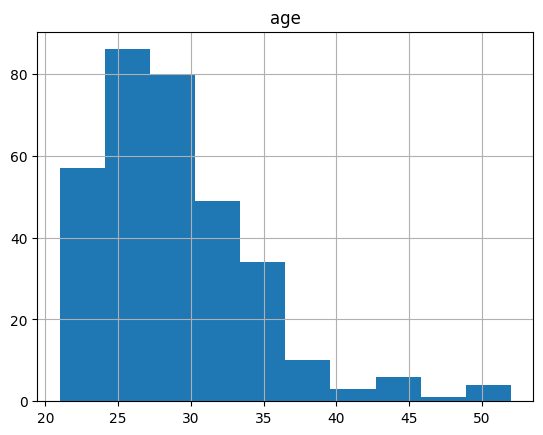

In [21]:
df.hist('age')

А как распределен уровень счастья?

array([[<Axes: title={'center': 'happy'}>]], dtype=object)

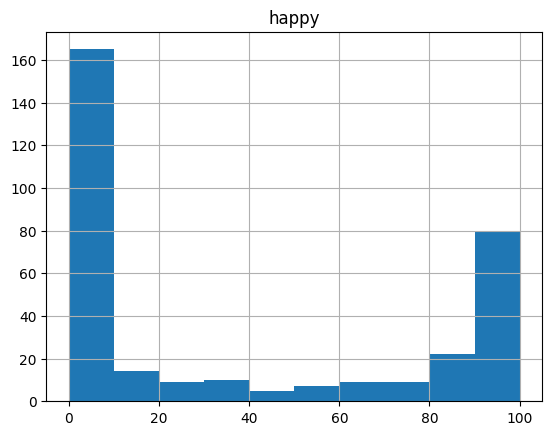

In [22]:
df.hist('happy')

Можем также построить зависимость счастья от возраста:

<Axes: xlabel='age', ylabel='happy'>

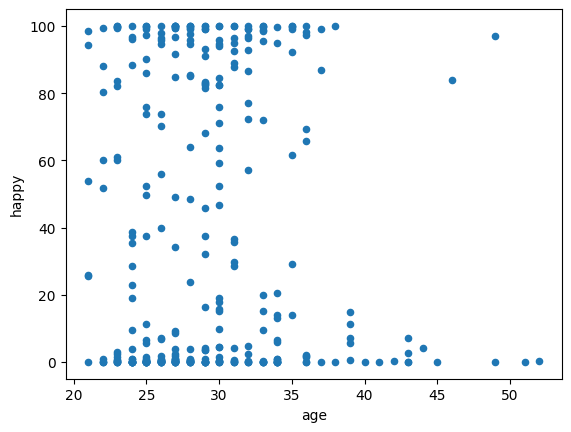

In [23]:
df.plot.scatter('age','happy')

Посмотрим на распределение счастья в зависимости от пола:

<Axes: xlabel='gender'>

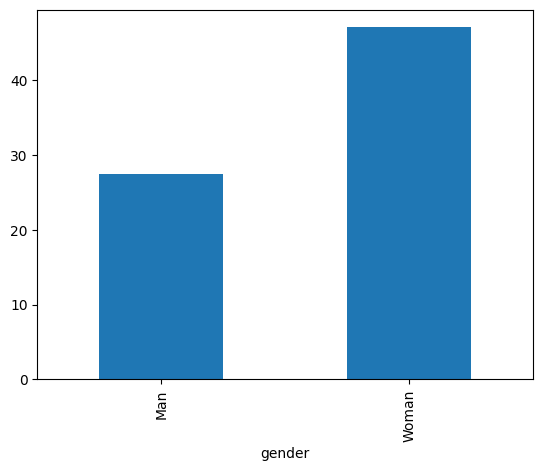

In [24]:
df.groupby('gender').mean()['happy'].plot.bar()

**Вывод:** девушки более счастливы!

И в зависимости от количества лиц на фотографии:

<AxesSubplot:xlabel='nfaces'>

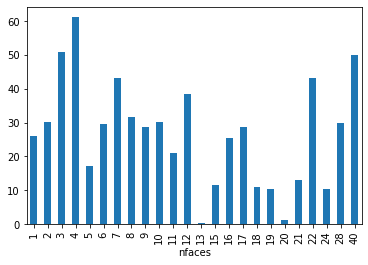

In [ ]:
df.groupby('nfaces').mean()['happy'].plot.bar()

**Вывод:** фотографироваться в компании немного веселее, но не сильно.

Наконец, распределение среднего счасться по возрастным группам:

<AxesSubplot:xlabel='age'>

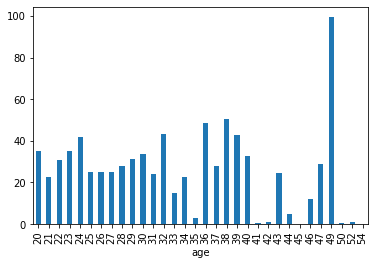

In [ ]:
df.groupby('age').mean()['happy'].plot.bar()

<AxesSubplot:xlabel='age_group'>

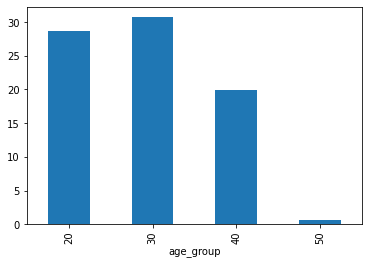

In [ ]:
df['age_group'] = (df['age'] // 10)*10
df.groupby('age_group').mean()['happy'].plot.bar()

Если счастье убывает, то интересно посмотреть, какие эмоции возрастают. Например, аналогичная динамика для грусти:

<AxesSubplot:xlabel='age_group'>

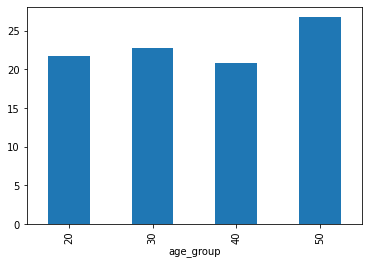

In [ ]:
df.groupby('age_group').mean()['sad'].plot.bar()

Посмотрим на средние эмоции людей:

<AxesSubplot:>

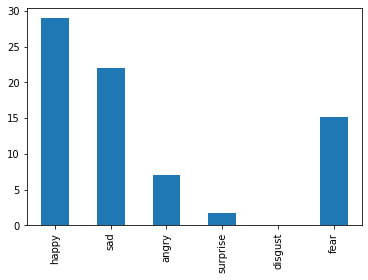

In [ ]:
df.mean()[['happy','sad','angry','surprise','disgust','fear']].plot.bar()

Тоже самое по мужчинам и по женщинам:

<AxesSubplot:>

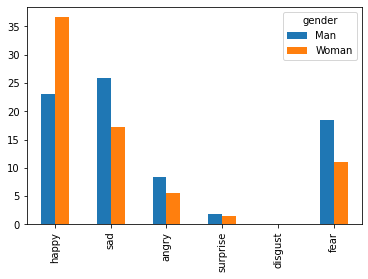

In [ ]:
df.groupby('gender').mean()[['happy','sad','angry','surprise','disgust','fear']].T.plot.bar()

### Смотрим на лица

Поскольку у нас также есть сами изображения, попробуем найти самые ярко-выраженные эмоции на фотографиях:

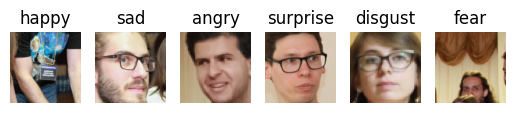

In [25]:
emotions = ['happy','sad','angry','surprise','disgust','fear']
emos = { t:(0,None) for t in emotions}
for x,im in zip(data,imgs):
    for k,v in emos.items():
        if x[k]>v[0]:
            emos[k]=(x[k],im)
fix,ax = plt.subplots(1,len(emos.keys()))
for i,e in enumerate(emos.keys()):
    if emos[e][1] is not None:
        ax[i].imshow(emos[e][1])
        ax[i].axis('off')
        ax[i].set_title(e)
plt.show()

Теперь найдём наиболее "противоречивую" эмоцию, в которой две составляющих проявлены наиболее сильно. Для этого ищем лицо, в котором максимально значение второй по величине эмоции, не считая нейтральной:

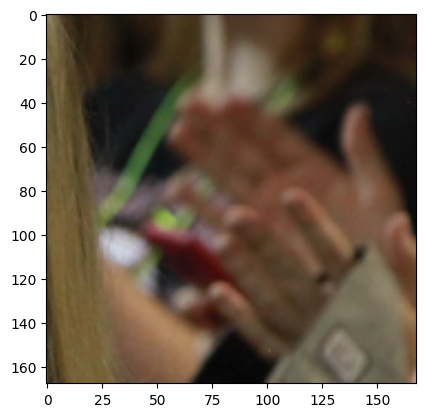

{'happy': 0.33744797110557556,
 'sad': 47.88420498371124,
 'angry': 2.315673418343067,
 'surprise': 0.8806814439594746,
 'disgust': 0.004918082049698569,
 'fear': 47.38284647464752}

In [26]:
mx = 0
img = None
emo = None
for x,im in zip(data,imgs):
    em = { k: x[k] for k in emotions }
    snd = sorted(em.values())[-2]
    if snd>mx:
        mx = snd
        img = im
        emo = em
plt.imshow(img)
plt.show()
emo

## Кластеризация лиц по эмоциям

Полученные результаты могут использоваться для дальнейших исследований с помощью алгоритмов машинного обучения. Например, мы увидели выше интресное сочетание эмоций. Можем посмотреть, выделяются ли среди всех лиц некоторые "типичные" конфигурации. Для этого необходимо применить алгоритм кластеризации, который реализован в библиотеке *Scikit Learn*:

In [27]:
import sklearn.cluster
import numpy as np
inp = np.array([ [ x[e] for e in emotions ] for x in data])
centroid, labels, inertia = sklearn.cluster.k_means(inp,3)

Мы попросили разбить все лица на 3 кластера, на основе расстояний между векторами эмоций. Теперь посмотрим на то, какие конфигурации эмоций у нас получились в центре таких кластеров (они возвращены в переменной `centroids`), и на наиболее "характерные" (близкие по расстоянию) лица для каждого из кластеров

In [28]:
def closest_face(e):
    mi = 999
    el = None
    for i,x in enumerate(data):
        if np.linalg.norm(inp[i]-e)<mi:
            mi=np.linalg.norm(inp[i]-e)
            el=i
    return imgs[el]

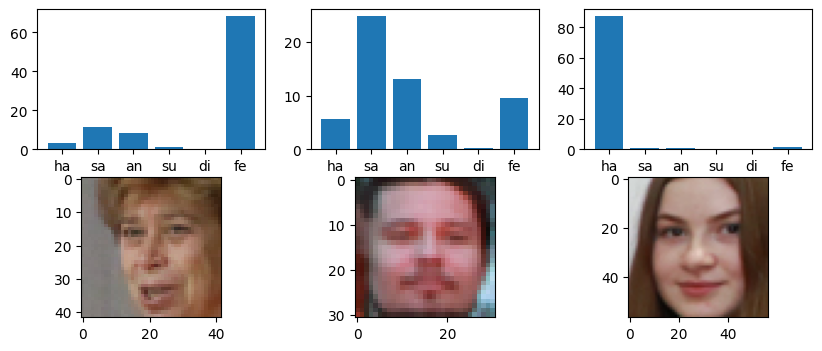

In [29]:
fig,ax = plt.subplots(2,len(centroid),figsize=(10,4))
for i,x in enumerate(centroid):
    ax[0,i].bar([t[0:2] for t in emotions],x)
    ax[1,i].imshow(closest_face(x))
plt.show()

Посмотрим на все лица в интересном кластере 0:

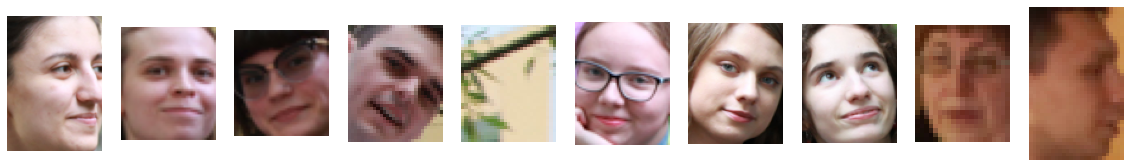

In [ ]:
cluster = 2
n=10

res = [im for x,i,im in zip(data,labels,imgs) if i==cluster]
fig,ax = plt.subplots(1,len(res[:n]),figsize=(20,4))
for i,x in enumerate(res[:n]):
    ax[i].imshow(x)
    ax[i].axis('off')
plt.show()

## Экспериментируйте!

Мы видим, что многие изображения лиц слишком маленькие, что усложняет анализ эмоций. Попробуйте ограничить размер рассматриваемых лиц снизу некоторым числом и посмотрите, насколько изменятся результаты исследования. Естественно, можно рассмотреть и другой набор фотографий с мероприятия!